<!-- https://github.com/damianavila/RISE/issues/255 -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}
    
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


figure {
    display: flex;
}

figure img {
    margin: auto;
}


figure figcaption {
    font-size: small;
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    text-align: center;
    margin-top: 2%;
}

</style>

In [51]:
%%html
<!-- https://github.com/damianavila/RISE/issues/255 -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}
    
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


figure {
    display: flex;
}

figure img {
    margin: auto;
}


figure figcaption {
    font-size: small;
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    text-align: center;
    margin-top: 2%;
}

</style>

## Notes

* [Rise -> PDF](https://rise.readthedocs.io/en/maint-5.5/exportpdf.html)
* [Customizing Rise](https://rise.readthedocs.io/en/maint-5.5/customize.html)

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt, style; style.use('fivethirtyeight')
import seaborn as sns; sns.set(context='talk')

from IPython.display import display, HTML, IFrame

# df = pd.read_csv('https://github.com/jacobdanovitch/Trouble-With-The-Curve/blob/master/data/twtc.csv?raw=true')
df = pd.read_csv('https://jacobdanovitch.blob.core.windows.net/datasets/twtc.csv')

<div style='text-align: center;'>
    <h1>CMSAC '19: Trouble with the Curve</h1>
    <h2>Jacob Danovitch</h2>
    <h3>Carleton University | Microsoft Cortana</h3>
</div>

## Why the name?

<br/>

<figure>
  <img src="https://static01.nyt.com/images/2012/09/21/arts/21TROUBLE_SPAN/JPTROUBLE-jumbo.jpg" style="width:50%;">
  <figcaption>
      Source: 
      <a href="https://www.nytimes.com/2012/09/21/movies/trouble-with-the-curve-with-clint-eastwood-and-amy-adams.html">
          nytimes
      </a>
  </figcaption>
</figure>

## The Dataset

* Scouting reports from MLB.com Prospect Watch & FanGraphs.com circa 2013
* Parsed 20-80 grades with lots of regex
* Found player IDs where possible

In [45]:
print(f'Size: {df.shape}')
df.sample(3)

Size: (9175, 25)


,name,key_mlbam,key_fangraphs,age,year,primary_position,eta,report,Arm,Changeup,...,Hit,Power,Run,Slider,Splitter,source,birthdate,mlb_played_first,debut_age,label
8438,Trevor Rogers,669432,sa3005423,21.6,2019,LHP,2021.0,Rogers was a divisive draft prospect. He was c...,NaN,55.0,...,NaN,NaN,NaN,50.0,NaN,fg_2019 Report,1899-12-30,NaN,NaN,0
3779,Jacob Amaya,676070,sa3005081,20.3,2019,SS,2021.0,Amaya impressed scouts at the 2017 National Hi...,55.0,NaN,...,55.0,40.0,50.0,NaN,NaN,mlbam,1998-09-03,NaN,NaN,-1
2603,Drew Anderson,623454,15130,23.8,2018,RHP,2018.0,It hasn't exactly been a direct path for Ander...,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,mlbam,1994-03-22,2017.0,22.8,1


### Dataset Statistics

In [15]:
df_label_mask = (df.drop(columns='label') == 0).assign(label=False)
df = df.mask(df_label_mask)

df.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
age,20.810431,2.307676,15.30,21.0,31.90
year,2016.715095,1.979656,2013.00,2017.0,2019.00
eta,2018.802799,2.422862,2013.00,2019.0,2025.00
Arm,53.824127,6.897962,30.00,55.0,80.00
Changeup,49.858290,5.364976,30.00,50.0,70.00
Control,49.205290,5.059892,30.00,50.0,70.00
Curveball,52.929583,5.675287,35.00,55.0,70.00
Cutter,52.475000,4.936723,40.00,50.0,70.00
Fastball,59.531873,6.665786,40.00,60.0,80.00
Field,51.633871,5.503923,30.00,50.0,80.00


Positional distribution:

In [34]:
(df.primary_position.value_counts() / len(df)).to_frame().round(4).style.bar()

,primary_position
RHP,0.3566
OF,0.2068
LHP,0.1196
SS,0.1171
C,0.0638
3B,0.0579
2B,0.0395
1B,0.0347
UTIL,0.0043


Label distribution:

In [22]:
(df.label.value_counts() / len(df)).round(4).to_frame().style.bar()

,label
0,0.6173
1,0.2304
-1,0.1523


## The 20-80 Scale

How do scouts grade prospects by position?

* Lefties have better control
* Righties have better fastballs

In [4]:
pitch_cols = ['Control', 'Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider', 'Splitter']

is_pitcher_mask = df.primary_position.isin(['LHP', 'RHP'])
has_label_mask = (df.label != -1) # ~df.label.isnull()

pitch_df = df[is_pitcher_mask & has_label_mask]
pitch_df.mask(df == 0).groupby('primary_position').agg('mean')[pitch_cols].T.style.highlight_max(axis=1, color='dodgerblue')

primary_position,LHP,RHP
Control,49.8371,48.9556
Fastball,56.3575,60.6458
Changeup,51.1233,49.3552
Curveball,52.6842,52.8867
Cutter,50.3409,52.9801
Slider,52.0267,52.912
Splitter,55,52.9412


* Up-the-middle spots are more defensive
* Corner guys are more power/arm oriented
* C, UTIL are jack-of-all-trades


In [5]:
hit_cols = ['Hit', 'Power', 'Field', 'Run', 'Arm']

hit_df = df[~is_pitcher_mask & has_label_mask]
hit_df.mask(df == 0).groupby('primary_position').agg('mean')[hit_cols].T.style.highlight_max(axis=1, color='dodgerblue')

primary_position,1B,2B,3B,C,OF,SS,UTIL
Hit,50.0324,52.2897,49.4915,47.6602,49.5577,50.0817,51
Power,55.1439,43.1034,53.0462,47.9333,49.3508,42.7895,41.2
Field,47.8669,49.931,48.9317,50.9398,52.5234,53.0971,51
Run,33.6151,51.5759,40.578,34.8495,54.5161,53.4155,50
Arm,50.1871,49.3069,56.1436,56,52.2856,55.9876,54.4


### Inter-grade correlations

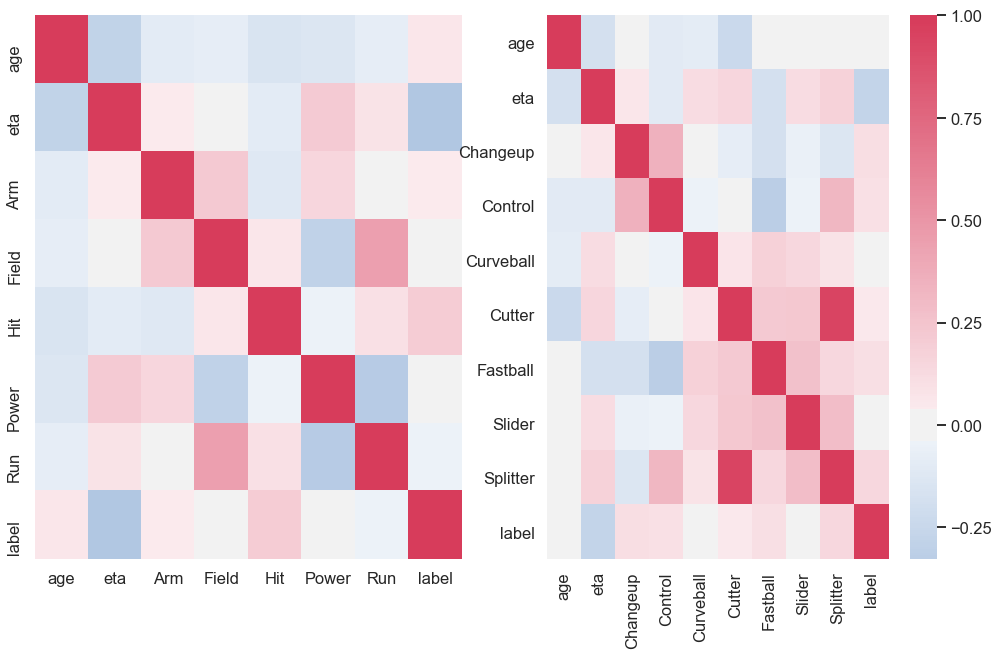

In [6]:
cmap=sns.diverging_palette(250, 5, as_cmap=True)
fig, (ax1, ax2) = plt.subplots(figsize = (15,10), ncols=2)

sns.heatmap(
    hit_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *pitch_cols]).corr(), 
    cmap=cmap,
    center=0,
    ax=ax1,
    cbar=False
)

sns.heatmap(
    pitch_df.drop(columns=['mlb_played_first', 'debut_age', 'year', *hit_cols]).corr(), 
    cmap=cmap, 
    center=0,
    ax=ax2
)

plt.show()

## Identifying Successful Prospects

### How are successful prospects described?

<figure>
    <img src="https://i.imgur.com/ZLjuovJ.png"> </img>
    <figcaption>What do you notice about the most frequent words used to describe successful prospects?</figcaption>
</figure>

In [ ]:
IFrame(src='assets/label-viz.html', width = 850, height=850)

All the most discriminative terms are player names!

In [37]:
pd.read_csv('assets/label_term_freqs.csv').nlargest(10, 'MLB Score')

,term,MiLB freq,MLB freq,MLB Score
35864,alford,0,47,1.000000
132332,nix,0,43,0.999147
29913,cecchini,0,38,0.997598
109491,robles,0,35,0.996513
36508,banda,0,34,0.996077
130563,fried,0,31,0.994667
79964,arroyo,0,30,0.994142
189461,ciuffo,0,30,0.994142
102142,tellez,0,29,0.993580
219935,grisham,0,29,0.993580


<figure>
    <img src="https://i.imgur.com/kcdnj5L.png"></img>
    <figcaption>Post-entity masking</figcaption>
</figure>

In [ ]:
IFrame(src='assets/processed-label-viz.html', width = 1000, height=1000)

Not perfect, but better!

In [40]:
pd.read_csv("assets/processed_label_term_freqs.csv").nlargest(10, 'MLB Score')

,term,MiLB freq,MLB freq,MLB Score
716,trade,210,218,1.000000
582,the package,20,42,0.999735
1151,at age,144,167,0.999512
236,as part,87,105,0.997560
2214,traded,116,118,0.997343
9034,youngest,54,78,0.997062
744,three team,17,35,0.997009
8289,that sent,39,61,0.996948
576,organization deal,34,56,0.996236
14306,age 20,30,53,0.996151


### Classifying successful prospects

#### Task Definition

* **Task**: Sequence of tokens $\longrightarrow$ binary label
* **Solution**: Hierarchical Attention Network (among others)

<!--
<figure style='display: flex; margin-bottom: 2%;'>
https://passage-1257910364.cos.na-siliconvalley.myqcloud.com/QANet_3.png
      <a href="http://fuyw.top/NLP_02_QANet/">
          fuyw.top 
      </a>
  <img src='https://cdn-images-1.medium.com/max/2000/0*25KIIWK1G7BPJMgN.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source: 
      <a href="https://mc.ai/self-attention-a-clever-compromise/">
          mc.ai 
      </a>
  </figcaption>
</figure>
-->

<figure style='display: flex; margin-bottom: 2%;'>
  <img src='https://miro.medium.com/max/852/1*28XVtq2lOjOmZhcSgu1NmQ.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source: 
    <a href="https://medium.com/analytics-vidhya/hierarchical-attention-networks-d220318cf87e">
        medium.com
    </a>
  </figcaption>
</figure>

#### Additional considerations

| Problem                   | Solution                      |
|---------------------------|-------------------------------|
| Heavy class imbalance     | Resampling + loss reweighting |
| Data sparsity             | Data augmentation             |
| (Relatively) small corpus | Pre-trained GloVe embeddings  |

#### Results

| Model             | Accuracy | F1     |
|-------------------|----------|--------|
| Bag-Of-Embeddings | 64.65%   | 53.78% |
| TextCNN           | 69.02%   | 56.42% |
| LSTM+SelfAttn     | 68.64%   | 54.65% |
| BCN               | 73.52%   | 43.33% |
| HAN               | 66.00%   | 54.07% |

<i style='font-size: small; float: left; position: absolute; bottom: 0;'>Hyperparameters: [link](https://github.com/jacobdanovitch/jdnlp/blob/master/experiments/twtc.json)</i>

* Why did you use a HAN if it wasn't even the best one?


<figure style='display: flex; margin-bottom: 2%;'>
  <img src='https://i.imgur.com/W6YhsDJ.png' alt='attn' style='width: 50%; margin: auto;'></img>
  <figcaption style='font-size: small'>Source: 
    <i style='font-size: small'>Yang, Z., Yang, D., Dyer, C., He, X., Smola, A.J., & Hovy, E.H. (2016). Hierarchical Attention Networks for Document Classification. HLT-NAACL.</i>
  </figcaption>
</figure>

<span class="mark">*Several pics of UI*</span>

## Scouting the scouting reports

### Language variation

<figure>
    <img src="https://i.imgur.com/HVLt9J5.png" />
    <figcaption>Variation in the reports of hitters and pitchers</figcaption>
</figure>

In [ ]:
IFrame(src='assets/pos-viz.html', width = 1000, height=1000)

### Semantic similarity

<i style='font-size: small'>Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space.</i>

<figure>
    <img src="https://i.imgur.com/pl74j1S.png"></img>
    <figcaption>Word-level similarity by success</figcaption>
</figure>

In [ ]:
IFrame(src='assets/embedding-label-viz.html', width = 1000, height=1000)

<figure>
    <img src="https://i.imgur.com/VFlzP43.png"></img>
    <figcaption>Word-level similarity by position</figcaption>
</figure>

In [ ]:
IFrame(src='assets/embedding-pos-viz.html', width = 1000, height=1000)

## Conclusion